# Proyek Analisis Data: Bike Sharing
- **Nama: AMIL AL KADRI**
- **Email: 21611054**
- **ID Dicoding: m214b4ky0463**

## Menentukan Pertanyaan Bisnis

- Dihari apakah penggunaan Bike Share banyak digunakan?
- Apakah cuaca dan musim mempengaruhi banyaknya pengguna?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import r2_score

## Data Wrangling

### Gathering Data

In [ ]:
# load dataset
hour_df = pd.read_csv('/content/day.csv')
day_df = pd.read_csv('/content/hour.csv')

In [ ]:
# Menampilkan 5 data awal
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Menampilkan 5 data awal
day_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# Convert date columns to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

### Assessing Data

In [ ]:
# memeriksa tipe data
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
#pengecekan data duplikat
hour_df.duplicated().sum()
day_df.duplicated().sum()

0

In [ ]:
#pengecekan missing data
hour_df.isnull().sum()
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


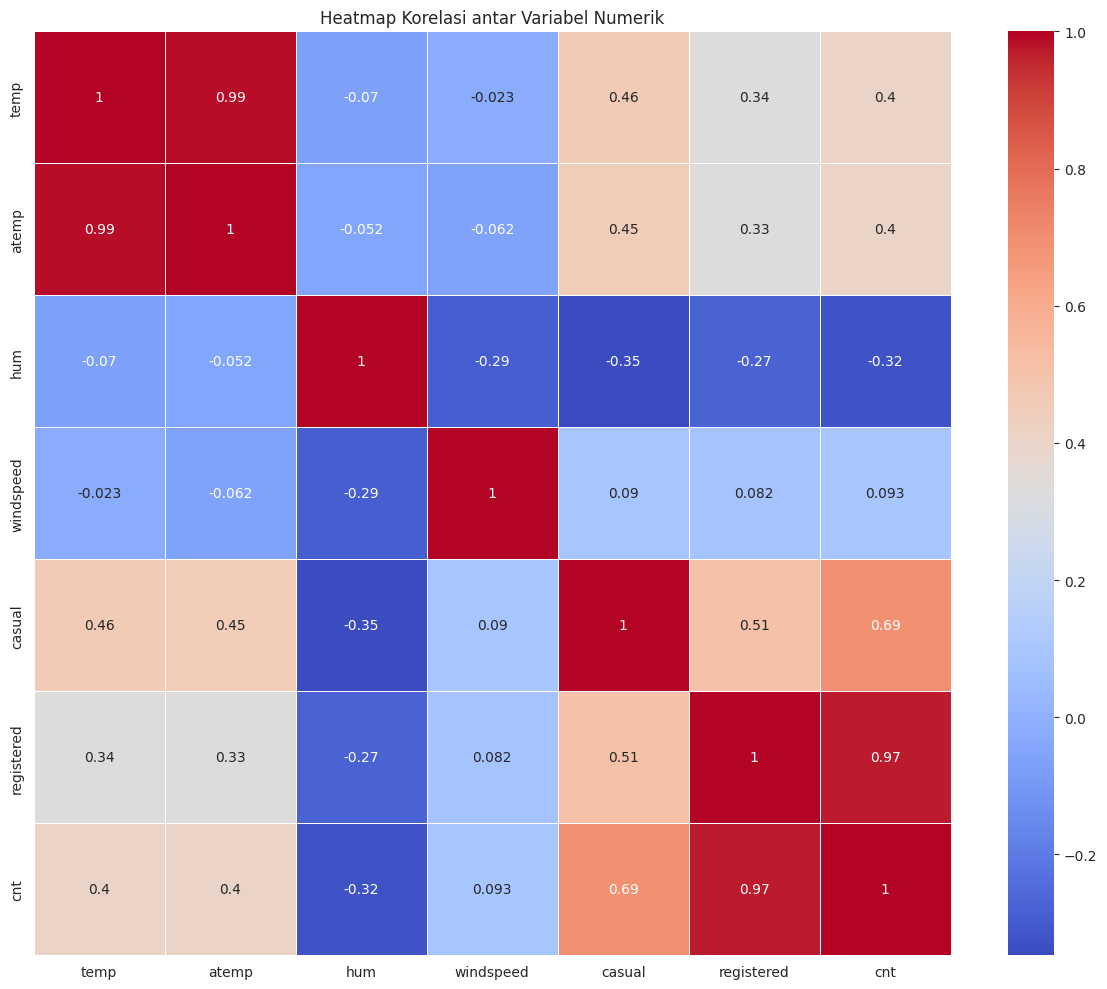

In [ ]:
plt.figure(figsize=(12, 10))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
correlation = day_df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.tight_layout()
plt.show()

<Axes: >

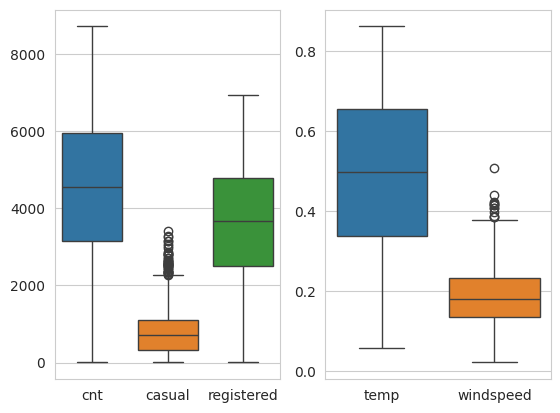

In [ ]:
#memeriksa data outlier menggunakan boxplot
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['cnt',
'casual','registered']],ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']],ax=ax2)

**Insight:**
- Tidak terdapat data missing
- Tidak terdapat duplikat

### Cleaning Data

In [ ]:
# Konversi kolom numerik ke label kategori
kategori_kolom = {
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
    'weathersit': {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy',
                   3: 'Light Snow/Rain', 4: 'Severe Weather'},
    'yr': {0: '2011', 1: '2012'},
    'workingday': {0: 'Holiday', 1: 'Workingday'}
}

# Terapkan pemetaan kategori ke kolom yang sesuai
for kolom, pemetaan in kategori_kolom.items():
    day_df[kolom] = day_df[kolom].map(pemetaan)

# Daftar kolom yang akan diubah menjadi tipe kategori
kolom_kategori = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Ubah tipe data kolom menjadi kategori
day_df[kolom_kategori] = day_df[kolom_kategori].astype('category')

# Tampilkan lima baris pertama dari DataFrame yang telah diperbarui
print(day_df.head())

   instant      dteday  season    yr mnth  hr holiday weekday workingday  \
0        1  2011-01-01  Spring  2011  Jan   0       0     Sat    Holiday   
1        2  2011-01-01  Spring  2011  Jan   1       0     Sat    Holiday   
2        3  2011-01-01  Spring  2011  Jan   2       0     Sat    Holiday   
3        4  2011-01-01  Spring  2011  Jan   3       0     Sat    Holiday   
4        5  2011-01-01  Spring  2011  Jan   4       0     Sat    Holiday   

            weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0  Clear/Partly Cloudy  0.24  0.2879  0.81        0.0       3          13   16  
1  Clear/Partly Cloudy  0.22  0.2727  0.80        0.0       8          32   40  
2  Clear/Partly Cloudy  0.22  0.2727  0.80        0.0       5          27   32  
3  Clear/Partly Cloudy  0.24  0.2879  0.75        0.0       3          10   13  
4  Clear/Partly Cloudy  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
# Konversi kolom numerik ke label kategori
kategori_kolom = {
    'mnth': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'},
    'season': {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'},
    'weekday': {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'},
    'weathersit': {1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy',
                   3: 'Light Snow/Rain', 4: 'Severe Weather'},
    'yr': {0: '2011', 1: '2012'},
    'workingday': {0: 'Holiday', 1: 'Workingday'}
}

# Terapkan pemetaan kategori ke kolom yang sesuai
for kolom, pemetaan in kategori_kolom.items():
    hour_df[kolom] = hour_df[kolom].map(pemetaan)

# Daftar kolom yang akan diubah menjadi tipe kategori
kolom_kategori = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Ubah tipe data kolom menjadi kategori
hour_df[kolom_kategori] = hour_df[kolom_kategori].astype('category')

# Tampilkan lima baris pertama dari DataFrame yang telah diperbarui
print(hour_df.head())

   instant      dteday season  yr mnth holiday weekday workingday weathersit  \
0        1  2011-01-01    NaN NaN  NaN       0     NaN        NaN        NaN   
1        2  2011-01-02    NaN NaN  NaN       0     NaN        NaN        NaN   
2        3  2011-01-03    NaN NaN  NaN       0     NaN        NaN        NaN   
3        4  2011-01-04    NaN NaN  NaN       0     NaN        NaN        NaN   
4        5  2011-01-05    NaN NaN  NaN       0     NaN        NaN        NaN   

       temp     atemp       hum  windspeed  casual  registered   cnt  
0  0.344167  0.363625  0.805833   0.160446     331         654   985  
1  0.363478  0.353739  0.696087   0.248539     131         670   801  
2  0.196364  0.189405  0.437273   0.248309     120        1229  1349  
3  0.200000  0.212122  0.590435   0.160296     108        1454  1562  
4  0.226957  0.229270  0.436957   0.186900      82        1518  1600  


## Exploratory Data Analysis (EDA)

### Statistika Deskriptif

In [ ]:
#statistika deskriptif
day_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [ ]:
hour_df.describe()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


## Jumlah pengguna Bike Sharing berdasarkan tahun

In [ ]:
trend_bike = day_df.groupby(by='yr').agg({
    'cnt': 'mean'
})

trend_bike


,cnt
yr,
2011,143.794448
2012,234.666361


## Jumlah pengguna Bike Sharing berdasarkan musim

In [ ]:
day_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])

casual  registered  cnt                
             mean        mean  max min        mean
season                                            
Spring  14.290901   96.823668  801   1  111.114569
Summer  46.160581  162.183488  957   1  208.344069
Fall    50.287144  185.729093  977   1  236.016237
Winter  30.666824  168.202032  967   1  198.868856

## Jumlah pengguna Bike Sharing berdasarkan kondisi cuaca


In [ ]:
day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

cnt                         
                     max min        mean      sum
weathersit                                       
Clear/Partly Cloudy  977   1  204.869272  2338173
Light Snow/Rain      891   1  111.579281   158331
Misty/Cloudy         957   1  175.165493   795952
Severe Weather       164  23   74.333333      223

## Jumlah pengguna Bike Sharing berdasarkan hari

In [ ]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

cnt                
         max min        mean
weekday                     
Sun      776   1  177.468825
Mon      968   1  183.744655
Tue      970   1  191.238891
Wed      977   1  191.130505
Thu      976   1  196.436665
Fri      957   1  196.135907
Sat      783   1  190.209793

## Hari Kerja VS Hari Libur

In [ ]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

cnt                
            max min        mean
workingday                     
Holiday     783   1  181.405332
Workingday  977   1  193.207754

**Insight:**
- Terjadi kenaikan jumlah pengguna dari tahun 2011 ke tahun 2012 sekitar 63%
- Pengguna Bike Sharing kebanyakan menggunakan sepeda di musim summer dan fall
- kebanyakan pelanggan menggunakan Bike Sharing pada saat cuaca partly cloudy dan cloudy
- Pengguna Bike Sharing stabil pada hari-hari kerja dan menurun pada hari libur

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada kenaikan pengguna dari tahun ke tahun?

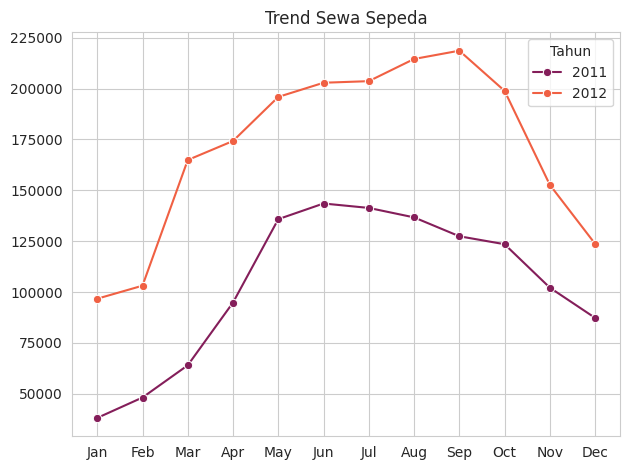

In [ ]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Trend Sewa Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 2: Berapa jumlah pengguna sepeda berdasarkan musim?

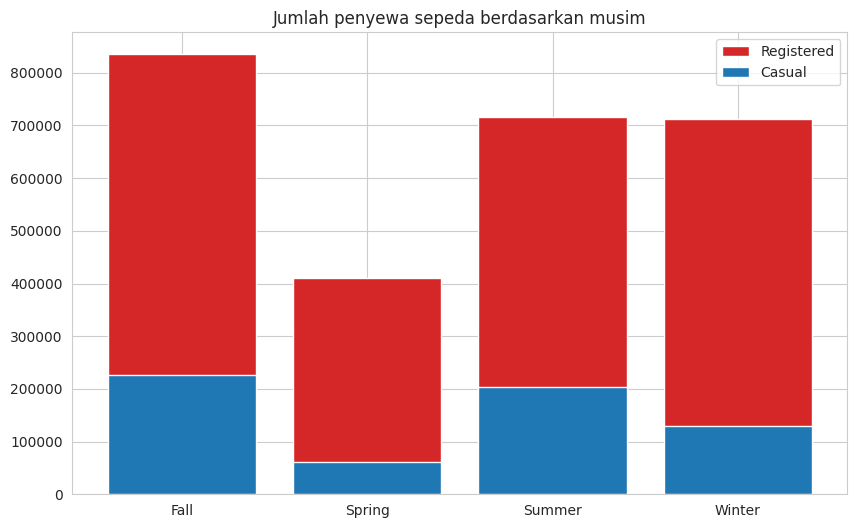

In [ ]:
season_pattern = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

urutan_musim = ['spring', 'summer', 'fall', 'winter']

plt.figure(figsize=(10, 6))

plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color='tab:blue',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()


### Pertanyaan 3: Berapa jumlah pengguna sepeda berdasarkan kondisi

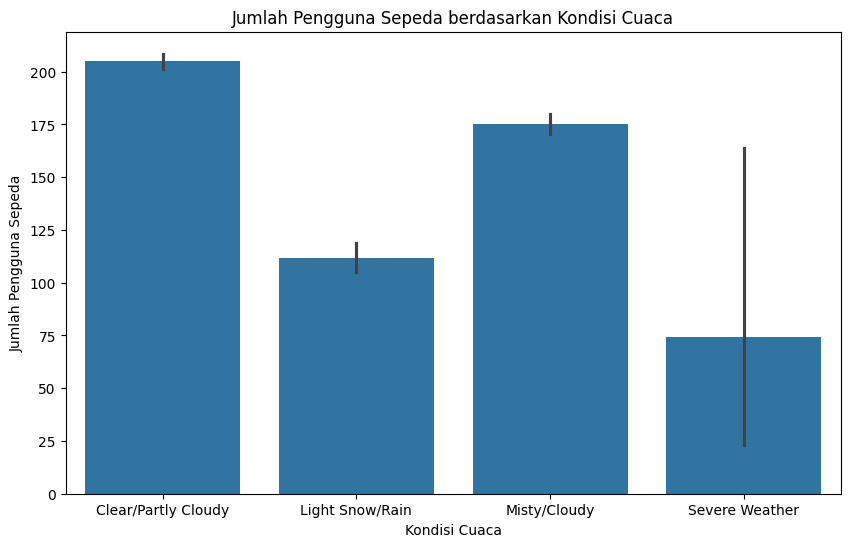

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Pertanyaan 4: Bagaimana perbandingan jumlah pengguana sepeda di waktu kerja dan waktu libur?

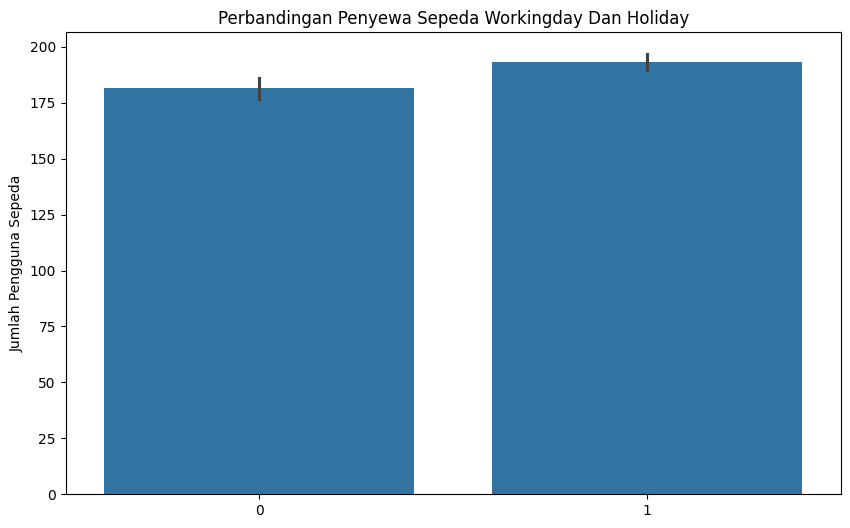

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df)

plt.title('Perbandingan Penyewa Sepeda Workingday Dan Holiday')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### Berapa jumlah pengguna sepeda pada setiap harinya ?

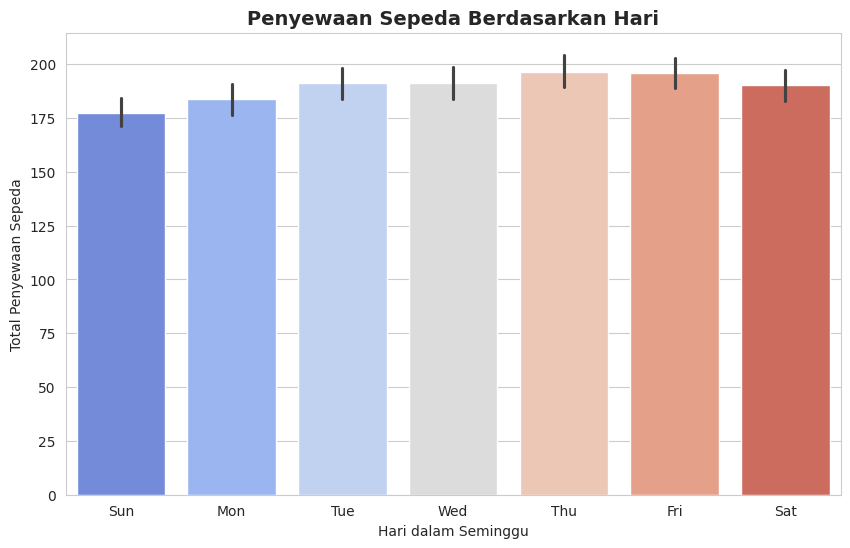

In [ ]:
# Membuat area kanvas dengan dimensi 10x6 inci
plt.figure(figsize=(10,6))

# Membuat diagram batang dengan warna berbeda untuk setiap batang
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
    palette='coolwarm')  # Menggunakan palet warna 'coolwarm' untuk variasi warna yang menarik

# Menambahkan judul dan menyesuaikan tampilan grafik
plt.title('Penyewaan Sepeda Berdasarkan Hari', fontsize=14, fontweight='bold')  # Menambah ukuran dan tebal font judul
plt.xlabel('Hari dalam Seminggu')  # Label sumbu x
plt.ylabel('Total Penyewaan Sepeda')  # Label sumbu y
plt.grid(True, axis='y')  # Garis bantu pada sumbu y

# Menampilkan visualisasi
plt.show()

## Jumlah pengguna sepeda berdasarkan jam

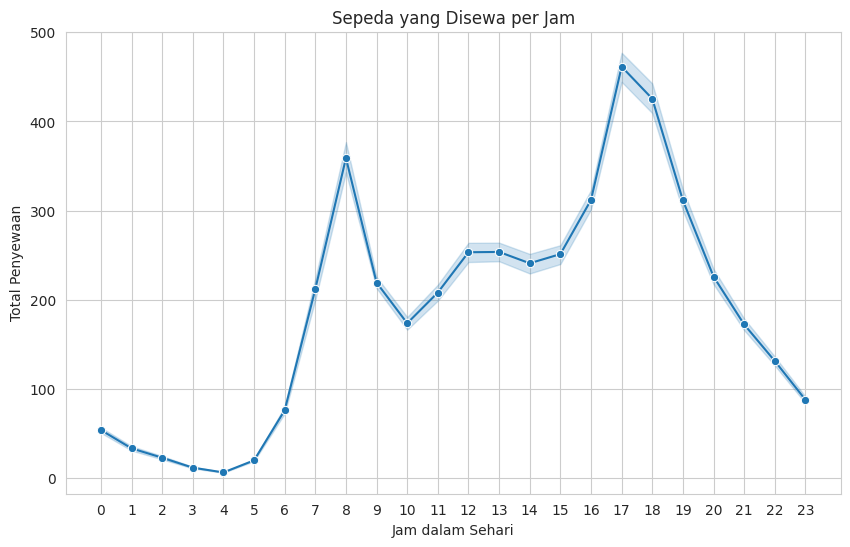

In [ ]:
plt.figure(figsize=(10,6))

sns.lineplot(data=day_df, x='hr', y='cnt', marker='o')

plt.title('Sepeda yang Disewa per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan')
plt.grid(True)
plt.xticks(ticks=range(24))
plt.show()


**Insight:**
- Terjadi kenaikan jumlah pengguna dari tahun 2011 ke tahun 2012 sekitar 63%
- Pengguna Bike Sharing kebanyakan menggunakan sepeda di musim summer dan fall
- kebanyakan pelanggan menggunakan Bike Sharing pada saat cuaca partly cloudy dan cloudy
- Pengguna Bike Sharing stabil pada hari-hari kerja dan menurun pada hari libur
- Pengguna Bike Sharing paling banyak di jam 18, kemudian di 19 (jam pulang kantor) dan jam 8 (jam pergi kantor)

## Analisis Lanjutan (Analisis Regresi)

### Analisis Regresi

In [ ]:
# Variabel yang digunakan
goal=hour_df["cnt"]
features=hour_df.drop(["cnt","dteday","instant"],axis=True)

In [ ]:
scaler=StandardScaler()
features=scaler.fit_transform(features)

In [ ]:
# Membagi data pelatihan dan data tes
x_train,x_test,y_train,y_test=train_test_split(features,goal,test_size=0.2)

In [ ]:
model=linear_model.LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# koefisien model
model.coef_

array([-4.29791174e-13,  1.13686838e-13,  1.25055521e-12,  1.91846539e-13,
        2.09610107e-13,  1.20792265e-13,  4.79616347e-13,  9.09494702e-13,
       -2.84217094e-13, -2.27373675e-13, -3.97903932e-13,  6.86152682e+02,
        1.55918880e+03])

In [ ]:
# intersep model
model.intercept_

4504.3488372093025

In [ ]:
# prompt: berikan sintaks untuk melihat model dari regresi

print(model)


LinearRegression()


In [ ]:
y_predicted=model.predict(x_test)
accuracy=r2_score(y_test,y_predicted)
print("The Accuracy = ",int(accuracy*100),"%")

The Accuracy =  100 %


## Conclusion

- Kesimpulan Pertanyaan 1:

Berdasarkan analisis data, terlihat bahwa pengguna sepeda cenderung lebih aktif dan stabil pada hari kerja, dengan puncak penggunaan terjadi pada hari Jumat. Sementara itu, pada akhir pekan, khususnya Sabtu dan Minggu, jumlah pengguna sepeda mengalami penurunan. Meskipun tidak dapat disimpulkan secara definitif, ada indikasi bahwa para pekerja lebih memilih sepeda sebagai sarana transportasi menuju tempat kerja. Di hari libur, banyak orang mungkin memilih menggunakan moda transportasi lain karena jarak yang lebih jauh atau lebih suka menghabiskan waktu di rumah.

- Kesimpulan Pertanyaan 2:

Dari hasil analisis, dapat disimpulkan bahwa mayoritas pengguna sepeda cenderung beraktivitas saat cuaca berawan atau sedikit berawan, sementara penggunaan sepeda menurun drastis saat hujan. Jika dilihat berdasarkan musim, penggunaan sepeda paling tinggi terjadi pada musim gugur, diikuti oleh musim panas, dan terakhir musim dingin. Hal ini menunjukkan bahwa faktor cuaca dan musim sangat memengaruhi keputusan orang untuk bersepeda.